In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def mnist_read():
    with open('./train-labels-idx1-ubyte', 'rb') as binary_file: #processing training labels
        binary_file.seek(0)  # Go to beginning
        #Reading first 4 bytes to extract the magic number
        magic_number = binary_file.read(4)
        #unpacking couple_bytes as a 4byte signed integer with Big-endian Byte order
        train_magic_number = struct.unpack('>i',magic_number) 
        #print(magic_number)
        #unpacking next 4 bytes to extract the number of items
        nitems = binary_file.read(4)
        nitems = struct.unpack('>i',nitems)
        #print(nitems)
        # Next, we use np.fromfile to create an array from data in a binary file(var)
        train_labels = np.fromfile(binary_file, np.uint8) #labels are an unsigned byte --> np.uint8 
        # More info: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fromfile.html
        #print (train_labels)
    with open('./train-images-idx3-ubyte', 'rb') as binary_file: #processing training images
        # reading the first 16 bytes: 
        # 4bytes: magic_number | 4bytes: # of images | 4bites: # of rows | 4bytes: # of cols
        data = binary_file.read(16) 
        magic_number, ntrimages, rows, cols = struct.unpack('>iiii', data)
        #print (magic_number, ntrimages, rows, cols)
        # extracting images and storing them into a numpy array (note that each image is stored as a vector, so we need to reshape it in the matrix form)
        train_images = np.fromfile(binary_file, np.uint8).reshape(ntrimages, rows, cols)
    with open('./t10k-labels-idx1-ubyte', 'rb') as binary_file:
        data = binary_file.read(8)
        magic_number, ntelabels = struct.unpack('>ii',data)
        #print (magic_number, ntelabels)
        test_labels = np.fromfile(binary_file, np.uint8) #reading the labels
    with open('./t10k-images-idx3-ubyte', 'rb') as binary_file:
        data = binary_file.read(16)
        magic_number, nteimages, rows, cols = struct.unpack('>iiii', data)
        #print (magic_number, nteimages, rows, cols)
        test_images = np.fromfile(binary_file, np.uint8).reshape(nteimages, rows, cols)
    return train_images, train_labels, ntrimages, test_images, test_labels, nteimages

In [3]:
train_images, train_labels, ntrimages, test_images, test_labels, nteimages = mnist_read()

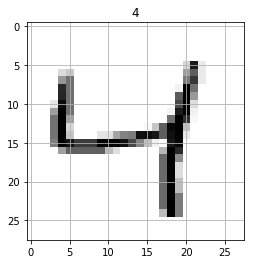

In [4]:
plt.imshow(train_images[2], cmap=cm.Greys)
plt.title(train_labels[2])
plt.grid()

In [5]:
# constructing the desired output vectors [1 0 0 ... 0]', [0 1 0 ... 0]', ...
global output_vectors
output_vectors = np.array([1,0,0,0,0,0,0,0,0,0], dtype=np.int)

In [6]:
e = lambda i: np.roll(output_vectors,i) #rotating 1 in output_vectors to generate desired output vectors

In [7]:
#Initializing the constants
eta=1
eps=0.1
n=6000#ntrimages
epoch = 0

In [18]:
W = np.random.uniform(-5,5,7840)
W = np.reshape(W,(10,784))
W = np.matrix(W)

def u(x):
    if x>=0:
        return 1
    else:
        return 0
    

In [19]:
errors = np.zeros(ntrimages)
x=np.empty((784,ntrimages))
x = x.T
vu = np.vectorize(u) #vectorizing the scalar function u


In [20]:
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors[epoch]+=1
        
    epoch+=1
    
    for i in range(n):
        W = W + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if(errors[epoch-1]/n < eps):
        flag=0
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch, errors[epoch-1]/n))

eta=1.000000	n=6000	epsilon=0.100000
Total Number of Epochs: 7
Convergence Error: 0.090333


### Part (e)

In [49]:
def test(W): 
    misclass_e = 0
    for i in range(nteimages): #nteimages=10000
        #x[i] = np.ravel(train_images[i])
        v = np.dot(W,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value

        if(j != train_labels[i]):
            misclass_e+=1
    #print('Total Errors: %d'%(misclass_e))
    return misclass_e
test(W)

4181

### Part (f) --- n=50 $\eta $ = 1 $\epsilon$ = 0

In [38]:
eta=1
eps=0.00
n=50
epoch_f = 0
errors_f = np.zeros(ntrimages)
misclass_f = np.zeros(ntrimages)
W_f = np.random.uniform(-5,5,7840)
W_f = np.reshape(W_f,(10,784))
W_f = np.matrix(W_f)
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W_f,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors_f[epoch_f]+=1
            
    misclass_f[epoch_f]=test(W_f);    
    epoch_f+=1
    
    for i in range(n):
        W_f = W_f + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W_f,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if(errors_f[epoch_f-1]/n <= eps):
        flag=0
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_f, errors_f[epoch_f-1]/n))

Total Errors: 8824
Total Errors: 7253
Total Errors: 6207
Total Errors: 6581
Total Errors: 6345
eta=1.000000	n=50	epsilon=0.000000
Total Number of Epochs: 5
Convergence Error: 0.000000


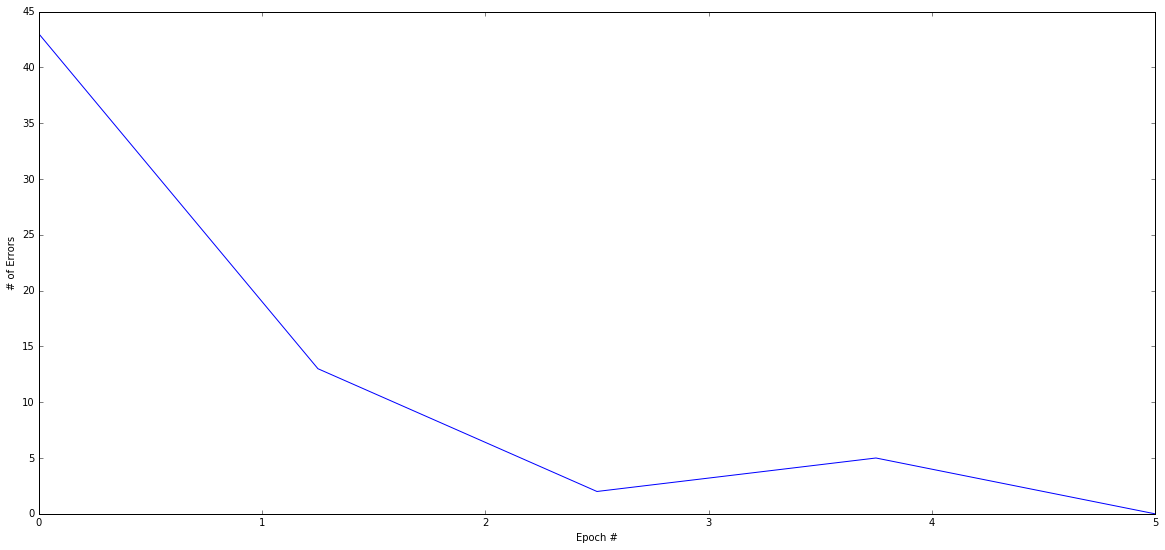

In [39]:
x1_axis = np.linspace(0,epoch_f,epoch_f)
x2_axis = errors_f[0:epoch_f]
plt.figure(figsize=(20, 9))  
plt.plot(x1_axis, x2_axis, "-", color="blue",label='test') #drawing the line w_0 + w_1*x_1 + w_2*x_2=0
plt.xlabel('Epoch #')
plt.ylabel('# of Errors')

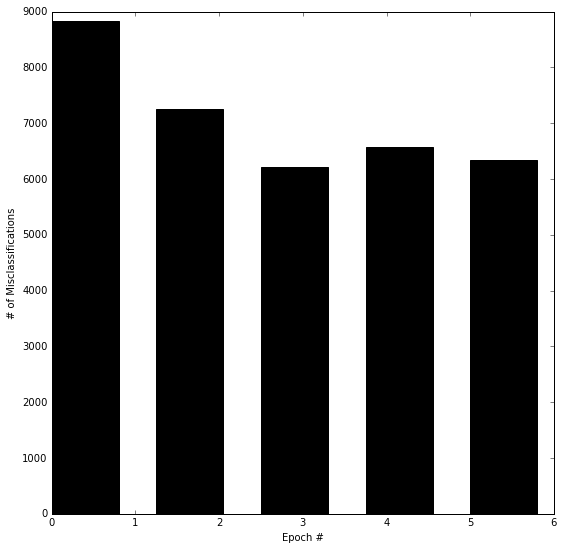

In [45]:
x1_axis = np.linspace(0,epoch_f,epoch_f)
x2_axis = misclass_f[0:epoch_f]
plt.figure(figsize=(9, 9))  
plt.bar(x1_axis, x2_axis,color='black') 
plt.xlabel('Epoch #')
plt.ylabel('# of Misclassifications')

In [46]:
test(W_f)

Total Errors: 6387


6387

The total number of misclassifications for part (f) is **6387**. However, for part (d) is **4181**. It seems that our network has done a better job at classification when it learns from fewer samples. As the intuition goes, when we have more samples the performance should improve overally but in our case it seems that the first 50 samples in addition to the new randomly initialized weights is classifying better. Hence, we can conclude that the number of misclassification depends on both initial values of the weight matrices, and the number of elements we trained the network.

### Part (g): n=1000 $\eta=1, \epsilon=0$

In [50]:
eta=1
eps=0.00
n=1000
epoch_g = 0
errors_g = np.zeros(ntrimages)
misclass_g = np.zeros(ntrimages)
W_g = np.random.uniform(-500,500,7840)
W_g = np.reshape(W_g,(10,784))
W_g = np.matrix(W_g)
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W_g,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors_g[epoch_g]+=1
            
    misclass_g[epoch_g]=test(W_g);    
    epoch_g+=1
    
    for i in range(n):
        W_g = W_g + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W_g,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if(errors_g[epoch_g-1]/n <= eps):
        flag=0
    #print(errors_g[epoch_g-1]/n)
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_g, errors_g[epoch_g-1]/n))

eta=1.000000	n=1000	epsilon=0.000000
Total Number of Epochs: 32
Convergence Error: 0.000000


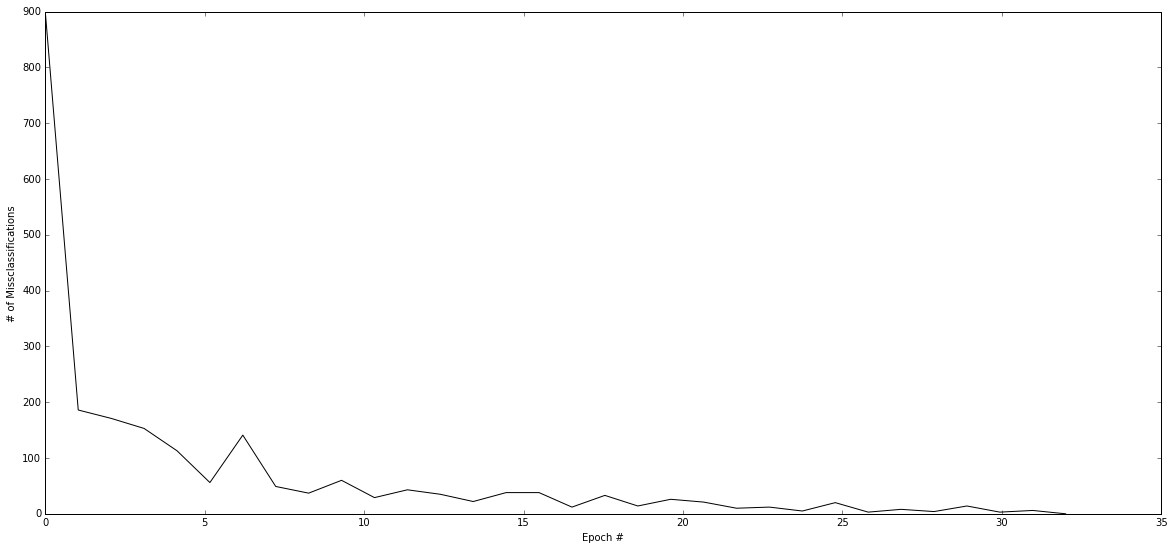

In [51]:
x1_axis = np.linspace(0,epoch_g,epoch_g)
x2_axis = errors_g[0:epoch_g]
plt.figure(figsize=(20, 9))  
plt.plot(x1_axis, x2_axis, "-", lw=1,color="black",label='test') #drawing the line w_0 + w_1*x_1 + w_2*x_2=0
plt.xlabel('Epoch #')
plt.ylabel('# of Missclassifications')

In [52]:
test(W_g)

4425

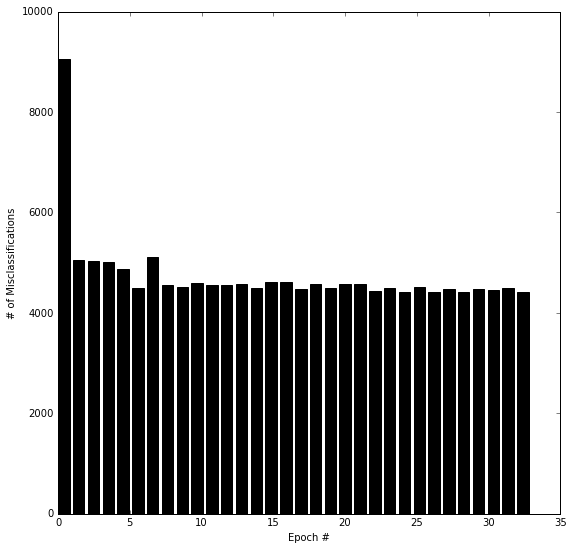

In [54]:
x1_axis = np.linspace(0,epoch_g,epoch_g)
x2_axis = misclass_g[0:epoch_g]
plt.figure(figsize=(9, 9))  
plt.bar(x1_axis, x2_axis,color='black') 
plt.xlabel('Epoch #')
plt.ylabel('# of Misclassifications')

Comparison








### Part(h): n=60000 $\eta=3$

In [58]:
eta=3
eps=0
n=ntrimages
max_epoch=40
epoch_h = 0
errors_h = np.zeros(ntrimages)
misclass_h = np.zeros(ntrimages)
W_h = np.random.uniform(-5,5,7840)
W_h = np.reshape(W_h,(10,784))
W_h = np.matrix(W_h)
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W_h,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors_h[epoch_h]+=1
            
    misclass_h[epoch_h]=test(W_h);    
    epoch_h+=1
    
    for i in range(n):
        W_h = W_h + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W_h,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if((errors_h[epoch_h-1]/n <= eps) | (epoch_h==max_epoch)):
        flag=0
    #print(epoch_h)
    #print(errors_h[epoch_h-1]/n)
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_h, errors_h[epoch_h-1]/n))

eta=3.000000	n=60000	epsilon=0.000000
Total Number of Epochs: 40
Convergence Error: 0.150533


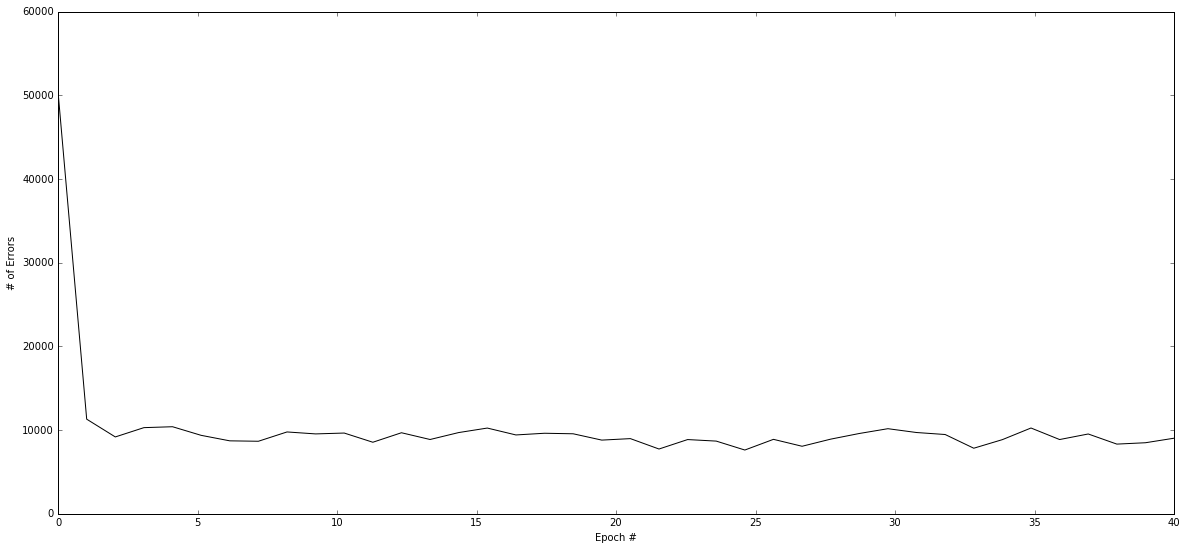

In [59]:
x1_axis = np.linspace(0,epoch_h,epoch_h)
x2_axis = errors_h[0:epoch_h]
plt.figure(figsize=(20, 9))  
plt.plot(x1_axis, x2_axis, "-", lw=1,color="black",label='test') 
plt.xlabel('Epoch #')
plt.ylabel('# of Errors')

In [60]:
print('Maximum Number of Epochs Achieved\neta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_h, errors_h[epoch_h-1]/n))

Maximum Number of Epochs Achieved
eta=3.000000	n=60000	epsilon=0.000000
Total Number of Epochs: 40
Convergence Error: 0.150533


It seems that the minimum value of the error among 200 epochs is:

In [61]:
print('Minimum error is: %f, and achieved at epoch %d'%(min(errors_h[0:epoch_h]/n),np.argmin(errors_h[0:epoch_h])))

Minimum error is: 0.126983, and achieved at epoch 24


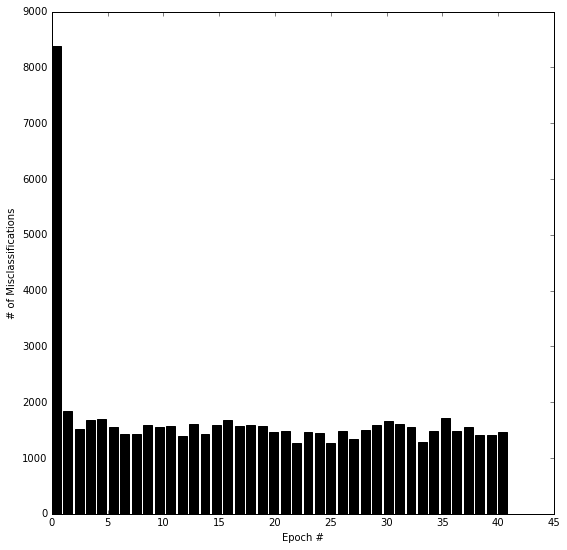

In [62]:
x1_axis = np.linspace(0,epoch_h,epoch_h)
x2_axis = misclass_h[0:epoch_h]
plt.figure(figsize=(9, 9))  
plt.bar(x1_axis, x2_axis,color='black') 
plt.xlabel('Epoch #')
plt.ylabel('# of Misclassifications')

So, for the next part, we will choose $\eta=2, \epsilon=0.550$.

Desciption



### Part(i) - First Try

In [119]:
eta=2
eps=0.550
n=ntrimages
max_epoch=500
epoch_h = 0
errors_h = np.zeros(ntrimages)
misclass_h = np.zeros(ntrimages)
W_h = np.random.uniform(-5,5,7840)
W_h = np.reshape(W_h,(10,784))
W_h = np.matrix(W_h)
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W_h,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors_h[epoch_h]+=1
            misclass_h[epoch_h]+=1
        
    epoch_h+=1
    
    for i in range(n):
        W_h = W_h + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W_h,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if((errors_h[epoch_h-1]/n <= eps) | (epoch_h==max_epoch)):
        flag=0
    #print(epoch_h)
    #print(errors_h[epoch_h-1]/n)
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_h, errors_h[epoch_h-1]/n))

eta=2.000000	n=60000	epsilon=0.550000
Total Number of Epochs: 182
Convergence Error: 0.509033


#### Calculating the total number of misclassification(First Try):

In [120]:
test(W_h)

Total Errors: 5953


### Part(i) : Second Try

In [ ]:
eta=3
eps=0.550
n=ntrimages
max_epoch=500
epoch_h = 0
errors_h = np.zeros(ntrimages)
misclass_h = np.zeros(ntrimages)
W_h = np.random.uniform(-5,5,7840)
W_h = np.reshape(W_h,(10,784))
W_h = np.matrix(W_h)
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W_h,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors_h[epoch_h]+=1
            misclass_h[epoch_h]+=1
        
    epoch_h+=1
    
    for i in range(n):
        W_h = W_h + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W_h,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if((errors_h[epoch_h-1]/n <= eps) | (epoch_h==max_epoch)):
        flag=0
    print(epoch_h)
    print(errors_h[epoch_h-1]/n)
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_h, errors_h[epoch_h-1]/n))

40<br>
0.645383333333<br>
41<br>
0.630283333333<br>
42<br>
0.755583333333<br>
43<br>
0.6914<br>
44<br>
0.5387<br>
eta=2.000000    n=60000 epsilon=0.550000<br>
Total Number of Epochs: 44<br>
Convergence Error: 0.538700

#### Calculating the total number of misclassification(Second Try):

In [116]:
test(W_h) #W_h = np.loadtxt('test.out', delimiter=',')

Total Errors: 6042


### Part(i) : Third Try

In [ ]:
eta=3
eps=0.550
n=ntrimages
max_epoch=500
epoch_h = 0
errors_h = np.zeros(ntrimages)
misclass_h = np.zeros(ntrimages)
W_h = np.random.uniform(-5,5,7840)
W_h = np.reshape(W_h,(10,784))
W_h = np.matrix(W_h)
flag=1;
while (flag):
    for i in range(n):
        x[i] = np.ravel(train_images[i])
        v = np.dot(W_h,x[i]) # Calculating the induced local field
        j = np.argmax(v) # Finding the index number corresponds to the maximum value
        
        if(j != train_labels[i]):
            errors_h[epoch_h]+=1
            misclass_h[epoch_h]+=1
        
    epoch_h+=1
    
    for i in range(n):
        W_h = W_h + np.dot( eta*( e(train_labels[i]) - vu(np.dot(W_h,x[i]))  ).T, np.array(x[i]).reshape((1,784)) )
    
    if((errors_h[epoch_h-1]/n <= eps) | (epoch_h==max_epoch)):
        flag=0
    print(epoch_h)
    print(errors_h[epoch_h-1]/n)
print('eta=%f\tn=%d\tepsilon=%f\nTotal Number of Epochs: %d\nConvergence Error: %f'%(eta, n, eps, epoch_h, errors_h[epoch_h-1]/n))

130<br>
0.63085<br>
131<br>
0.637783333333<br>
132<br>
0.72625<br>
133<br>
0.608233333333<br>
134<br>
0.689916666667<br>
135<br>
0.673183333333<br>
136<br>
0.672033333333<br>
137<br>
0.669416666667<br>
138<br>
0.536783333333<br>
eta=2.000000    n=60000 epsilon=0.550000<br>
Total Number of Epochs: 138<br>
Convergence Error: 0.536783

#### Calculating the total number of misclassification(Third Try):


In [117]:
test(W_h)

Total Errors: 6408


The Total Number of Misclassifications for first, second and third try are **5953, 6042, and 6408** respectively. Although the total number of samples on which the network has been trained are equal for all cases, the initial random weight vectors are affecting the performance of the network on the test images and the number of misclassifications depends on the initial value of the weight vectors (because different weight vectors might achieve the same performance on the training images but with different values. So, they would have different error on the test images.)